In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
from sklearn.impute import SimpleImputer

# Data Exploration and Data Cleaning

### Loading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Verina\Documents\data mining project\adult.csv',na_values='?')
data
imported_data = data.copy()
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Exploring the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.shape

(32561, 15)

In [5]:
numeric_data = data.select_dtypes(include=['number']).columns
data[numeric_data].isnull().sum()

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [6]:
categorical_data = data.select_dtypes(include=['object']).columns
data[categorical_data].isnull().sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

#### Conclusion:
Only categorical data have missing values

In [7]:
# Statistics about data
data[numeric_data].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
# Unique values
data[categorical_data].describe().transpose()

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,31978,41,United-States,29170
income,32561,2,<=50K,24720


### Data Handling and Cleaning

#### Use SimpleImputer to handle missing data:
This method is used to handle missing data by replacing all Null values with the top frequent value in its feature.

In [9]:
# Using most frequent
# Missing data is categorical
# Initialize the imputer model
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values using the most frequent strategy
imputer.fit(data[categorical_data])
imputed_data = imputer.transform(data[categorical_data])

# Convert the imputed data back to a DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=data[categorical_data].columns)
data = pd.concat([imputed_data,data[numeric_data]],axis=1) 

In [10]:
data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K,90,77053,9,0,4356,40
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K,82,132870,9,0,4356,18
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K,66,186061,10,0,4356,40
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K,54,140359,4,0,3900,40
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K,41,264663,10,0,3900,40


In [11]:
data.isnull().sum()
# Now our Data doesn't have missing values

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

#### Handling Duplications 

In [12]:
# Removing duplicates(repetition)
# Check if there are any duplicates using duplicated() method
data.duplicated().sum()

24

In [13]:
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

##### Visualizing Data Distributions After Cleaning

Text(0.5, 0.98, 'Numeric Data Distributions')

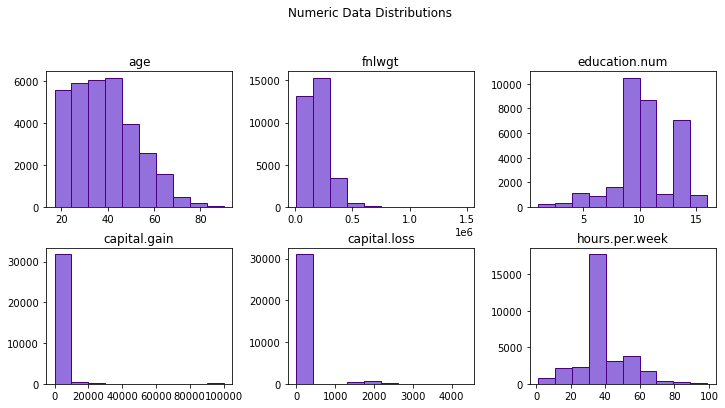

In [15]:
data[numeric_data].hist(figsize=(12,9),layout=(3,3),color='mediumpurple',edgecolor='indigo',grid=False)
plt.suptitle('Numeric Data Distributions')

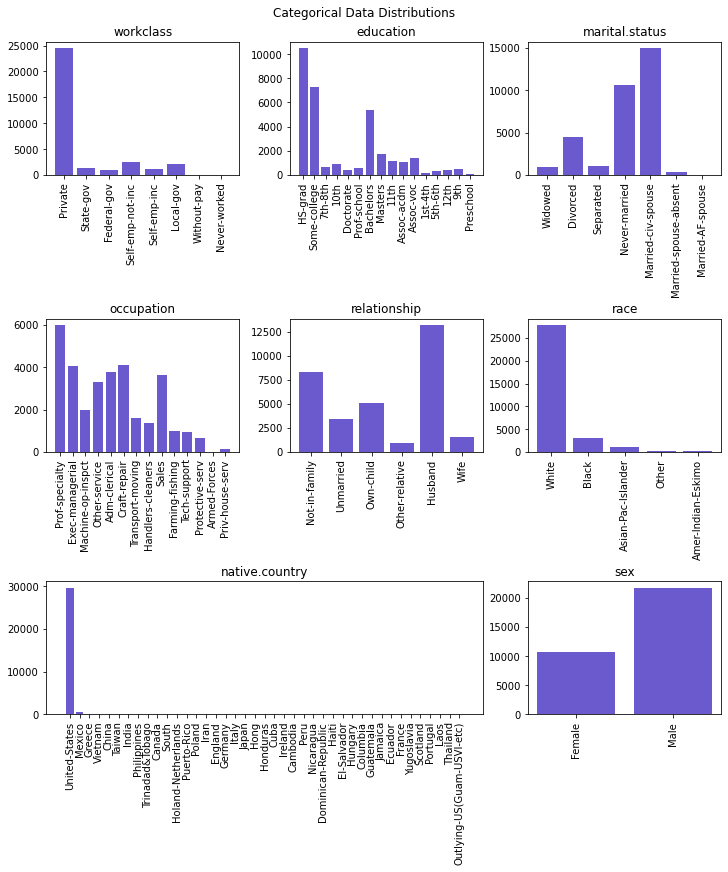

In [16]:
fig = plt.figure(figsize=(10,12),layout='constrained')
fig.suptitle('Categorical Data Distributions')

gs = fig.add_gridspec(3,3)


ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(list(data[categorical_data[0]].value_counts(sort=False).keys()),
             list(data[categorical_data[0]].value_counts(sort=False).values),color='slateblue')
ax1.set_title(categorical_data[0])
ax1.tick_params(axis='x', rotation=90)

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(list(data[categorical_data[1]].value_counts(sort=False).keys()),
             list(data[categorical_data[1]].value_counts(sort=False).values),color='slateblue')
ax2.set_title(categorical_data[1])
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(list(data[categorical_data[2]].value_counts(sort=False).keys()),
             list(data[categorical_data[2]].value_counts(sort=False).values),color='slateblue')
ax3.set_title(categorical_data[2])
ax3.tick_params(axis='x', rotation=90)

ax4 = fig.add_subplot(gs[1, 0])
ax4.bar(list(data[categorical_data[3]].value_counts(sort=False).keys()),
             list(data[categorical_data[3]].value_counts(sort=False).values),color='slateblue')
ax4.set_title(categorical_data[3])
ax4.tick_params(axis='x', rotation=90)

ax5 = fig.add_subplot(gs[1, 1])
ax5.bar(list(data[categorical_data[4]].value_counts(sort=False).keys()),
             list(data[categorical_data[4]].value_counts(sort=False).values),color='slateblue')
ax5.set_title(categorical_data[4])
ax5.tick_params(axis='x', rotation=90)

ax6 = fig.add_subplot(gs[1, 2])
ax6.bar(list(data[categorical_data[5]].value_counts(sort=False).keys()),
             list(data[categorical_data[5]].value_counts(sort=False).values),color='slateblue')
ax6.set_title(categorical_data[5])
ax6.tick_params(axis='x', rotation=90)

ax7 = fig.add_subplot(gs[2, 0:2])
ax7.bar(list(data[categorical_data[7]].value_counts(sort=False).keys()),
             list(data[categorical_data[7]].value_counts(sort=False).values),color='slateblue')
ax7.set_title(categorical_data[7])
ax7.tick_params(axis='x', rotation=90)

ax8 = fig.add_subplot(gs[2, 2])
ax8.bar(list(data[categorical_data[6]].value_counts(sort=False).keys()),
             list(data[categorical_data[6]].value_counts(sort=False).values),color='slateblue')
ax8.set_title(categorical_data[6])
ax8.tick_params(axis='x', rotation=90)



plt.show()

<AxesSubplot:>

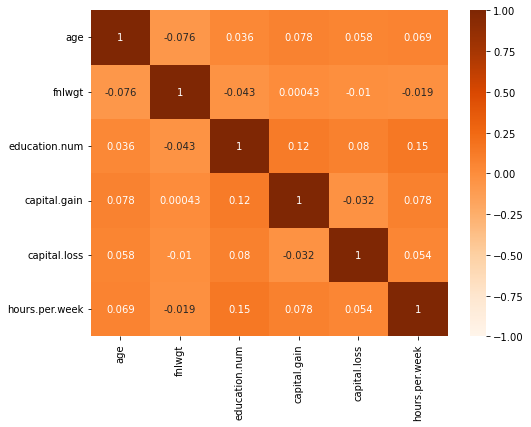

In [17]:
# correlation between numeric attributes
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap = 'Oranges',vmin=-1, vmax=1)

##### Visualizing Relationship between income and other attributes

age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
capital.gain      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
capital.loss      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
education.num           AxesSubplot(0.125,0.125;0.227941x0.343182)
fnlwgt               AxesSubplot(0.398529,0.125;0.227941x0.343182)
hours.per.week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

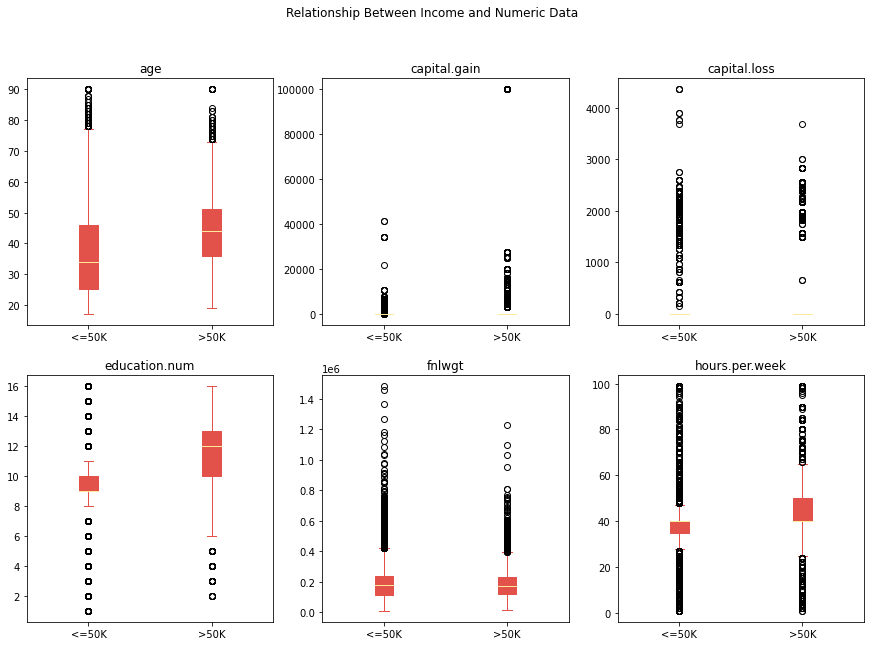

In [18]:
sns.set_palette("Spectral")
data.plot.box(subplots=True,layout=(2,3),by='income',figsize=(15,10),patch_artist=True,title='Relationship Between Income and Numeric Data')

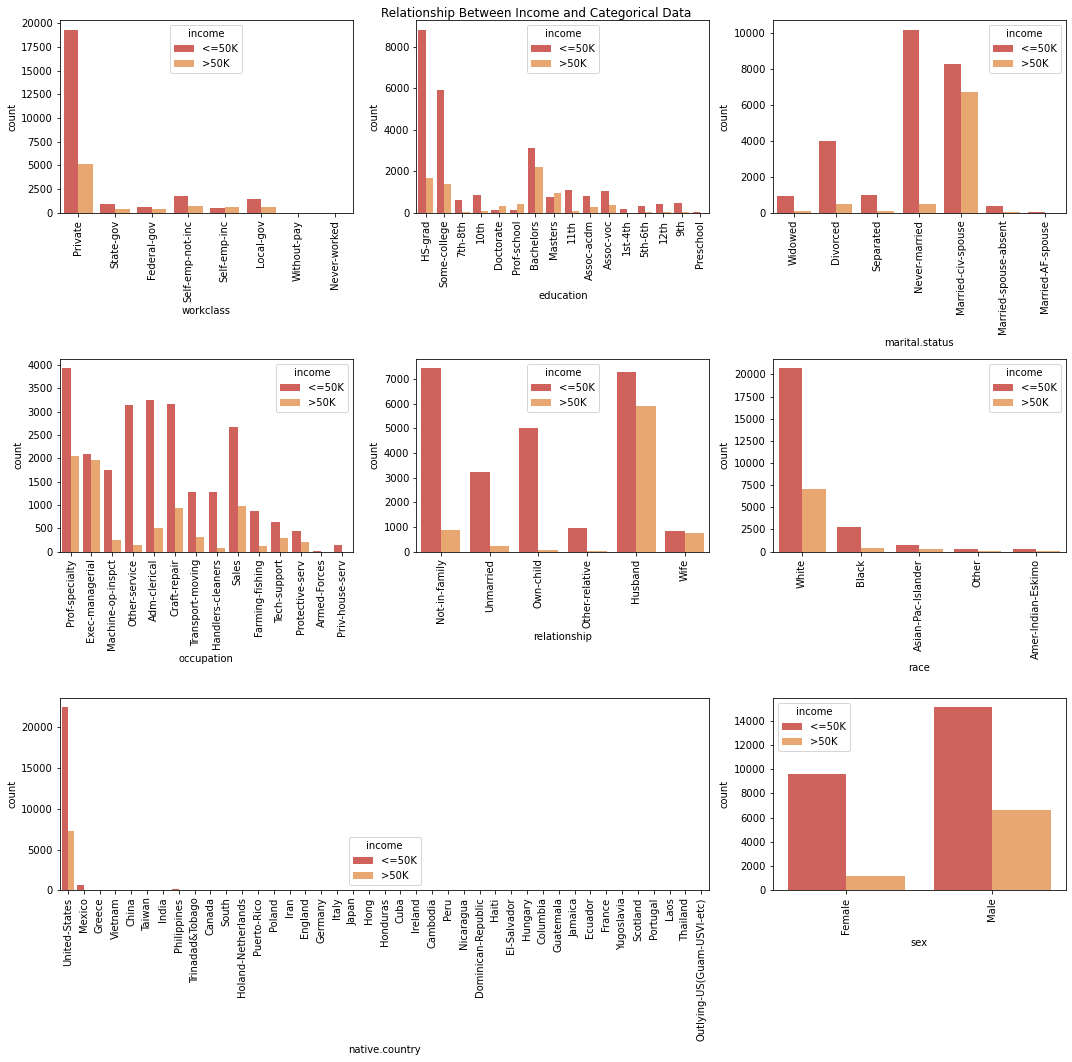

In [19]:
fig = plt.figure(figsize=(15,15),layout='tight')
fig.suptitle('Relationship Between Income and Categorical Data')

gs = fig.add_gridspec(3,3)

sns.set_palette("Spectral")

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(ax=ax1, data=data, x=categorical_data[0],hue='income')
ax1.tick_params(axis='x', rotation=90)

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(ax=ax2, data=data, x=categorical_data[1],hue='income')
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(ax=ax3, data=data, x=categorical_data[2],hue='income')
ax3.tick_params(axis='x', rotation=90)

ax4 = fig.add_subplot(gs[1, 0])
sns.countplot(ax=ax4, data=data, x=categorical_data[3],hue='income')
ax4.tick_params(axis='x', rotation=90)

ax5 = fig.add_subplot(gs[1, 1])
sns.countplot(ax=ax5, data=data, x=categorical_data[4],hue='income')
ax5.tick_params(axis='x', rotation=90)

ax6 = fig.add_subplot(gs[1, 2])
sns.countplot(ax=ax6, data=data, x=categorical_data[5],hue='income')
ax6.tick_params(axis='x', rotation=90)

ax7 = fig.add_subplot(gs[2, 0:2])
sns.countplot(ax=ax7, data=data, x=categorical_data[7],hue='income')
ax7.tick_params(axis='x', rotation=90)

ax8 = fig.add_subplot(gs[2, 2])
sns.countplot(ax=ax8, data=data, x=categorical_data[6],hue='income')
ax8.tick_params(axis='x', rotation=90)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'Assoc-voc'),
  Text(5, 0, '11th'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, '10th'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Prof-school'),
  Text(10, 0, '9th'),
  Text(11, 0, '12th'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, '5th-6th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

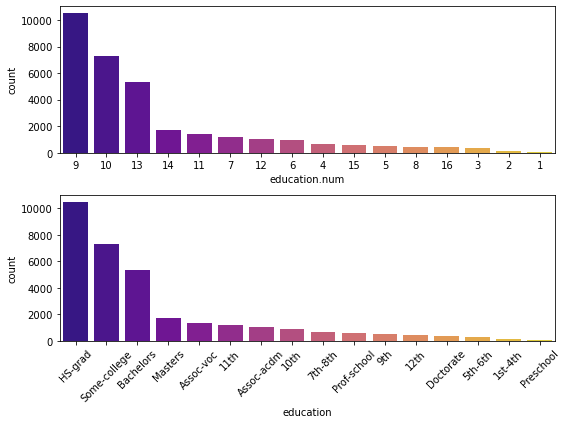

In [20]:
plt.figure(figsize=(8,6),layout='tight')
plt.subplot(2,1,1)
sns.countplot(x=data['education.num'],palette='plasma',
             order=data['education.num'].value_counts().index)
plt.subplot(2,1,2)
sns.countplot(x=data['education'],palette='plasma',
             order=data['education'].value_counts().index)
plt.xticks(rotation=45)

###### by plotting the counts of education and education.num columns, we can see they represent the same thing

In [21]:
data.drop(columns=['education.num'],inplace=True)
data

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age,fnlwgt,capital.gain,capital.loss,hours.per.week
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K,90,77053,0,4356,40
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K,82,132870,0,4356,18
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K,66,186061,0,4356,40
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K,54,140359,0,3900,40
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K,41,264663,0,3900,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K,22,310152,0,0,40
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,27,257302,0,0,38
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,40,154374,0,0,40
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,58,151910,0,0,40


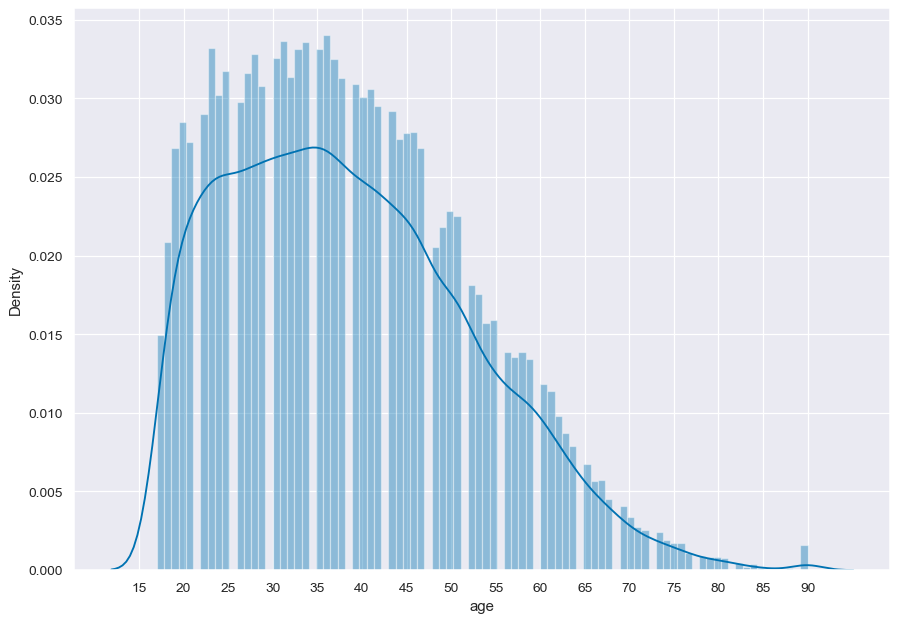

In [22]:
# Note that age is skewed and have outliers 
sns.set(rc={'figure.figsize':(11.7,8.27),'figure.dpi':90})
sns.distplot(x=data["age"],kde=True,bins=90,color="#0072B2")
plt.xticks(np.arange(15,95,5))
plt.xlabel("age")
plt.show()

### Binning
 Binning can be a useful technique for reducing the impact of noise in data
 age need to be binned.

In [23]:
data['Age Groups'] = pd.cut(data['age'],7)

In [24]:
data['Age Groups'].unique()

[(79.571, 90.0], (58.714, 69.143], (48.286, 58.714], (37.857, 48.286], (27.429, 37.857], (69.143, 79.571], (16.927, 27.429]]
Categories (7, interval[float64, right]): [(16.927, 27.429] < (27.429, 37.857] < (37.857, 48.286] < (48.286, 58.714] < (58.714, 69.143] < (69.143, 79.571] < (79.571, 90.0]]

In [25]:
data = data.drop('age',axis=1)

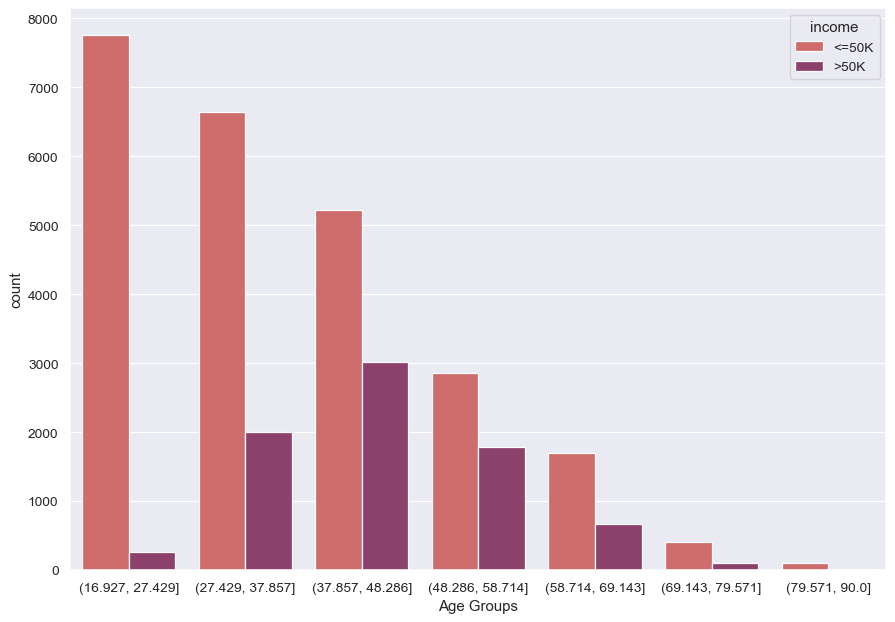

In [26]:
# Visualization for grouped data
sns.countplot(data['Age Groups'], hue = data['income'], palette='flare')
plt.show()

# Data Transformation

### Feature Engineering

In [27]:
# Education feature
data.education= data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'School')
data.education = data.education.replace('HS-grad', 'High School')
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher')
data.education = data.education.replace('Bachelors', 'Undergrad')
data.education = data.education.replace('Masters', 'Graduated')
data.education = data.education.replace('Doctorate', 'Doc')
# We replace the similar labels in Education feature with the same, decreasing the number that will not affect the accuracy.

In [28]:
# Martial status
data['marital.status']= data['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
data['marital.status']= data['marital.status'].replace(['Never-married'], 'Not-Married')
data['marital.status']= data['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'Other')
# We do as the previous line

##### Visualize the effect of data transformation

Text(0.5, 1.0, 'education (after transformation)')

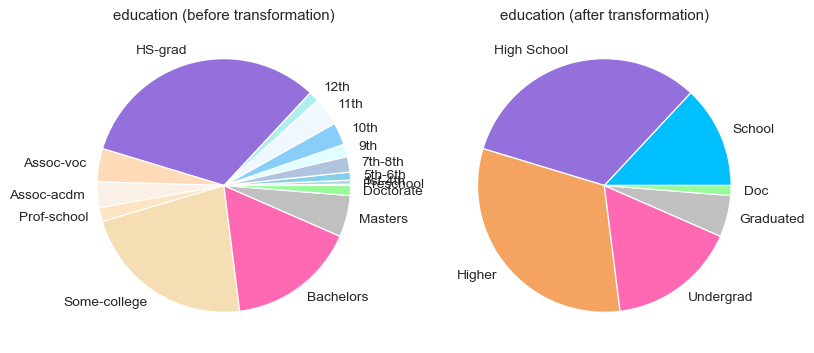

In [29]:
# group education by value counts and reorder rows
edu1 = imported_data[['education']].value_counts().to_frame()
edu1=edu1.reindex([['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th','HS-grad',
              'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college','Bachelors','Masters','Doctorate']]).reset_index()
edu1.columns = ['education','count']
edu2 = data[['education']].value_counts().to_frame()
edu2=edu2.reindex([['School','High School','Higher','Undergrad','Graduated','Doc']]).reset_index()
edu2.columns = ['education','count']

#define colors
colours = {'School':'deepskyblue',
           'Preschool':'powderblue',
           '1st-4th':'lightblue',
           '5th-6th':'skyblue', 
           '7th-8th':'lightsteelblue', 
           '9th':'lightcyan',
           '10th':'lightskyblue',
           '11th':'aliceblue',
           '12th':'paleturquoise',
           'High School':'mediumpurple',
           'HS-grad':'mediumpurple',
           'Higher':'sandybrown',
           'Assoc-voc':'peachpuff',
           'Assoc-acdm':'linen',
           'Prof-school':'bisque',
           'Some-college':'wheat',
           'Undergrad':'hotpink',
           'Bachelors':'hotpink',
           'Graduated':'silver',
           'Masters':'silver',
           'Doc':'palegreen',
           'Doctorate':'palegreen'}

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pie(edu1['count'],labels=edu1['education'],colors=[colours[key] for key in list(edu1['education'])])
plt.title('education (before transformation)')
plt.subplot(1,2,2)
plt.pie(edu2['count'],labels=edu2['education'],colors=[colours[key] for key in list(edu2['education'])])
plt.title('education (after transformation)')

Text(0.5, 1.0, 'marital.status (after transformation)')

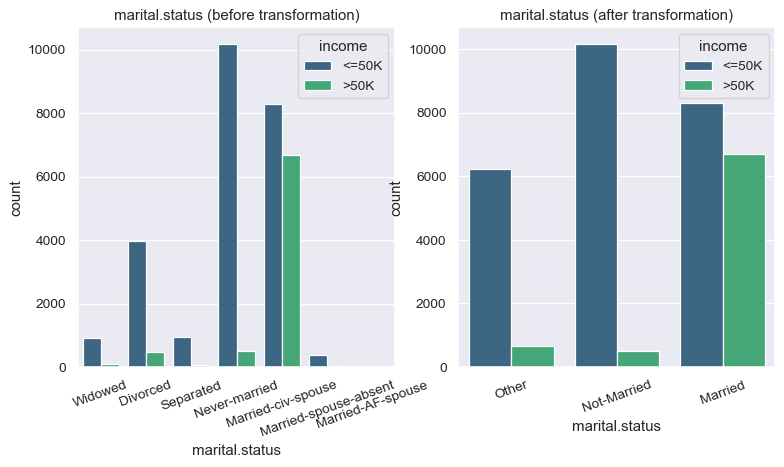

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xticks(rotation=20)
plt.title('marital.status (before transformation)')
sns.countplot(x=imported_data['marital.status'],hue=imported_data['income'],palette="viridis")
plt.subplot(1,2,2)
plt.xticks(rotation=20)
sns.countplot(x=data['marital.status'],hue=data['income'],palette="viridis")
plt.title('marital.status (after transformation)')

### Encoding
Encoding is a method from the sklearn library, It is used to transform categorical or optimal data to numerical data based on which method will be chosen.
LabelEncoder( ) is better with optimal data or categorical with less number of labels in one feature.

In the One-Hot encoder, each category is represented by a binary vector with a length equal to the number of categories present in the data. We replace the similar labels in Education feature with the same, decreasing the number that will not affect the accuracy.

In [31]:
from sklearn import preprocessing

tr = preprocessing.LabelEncoder()
data['sex'] = tr.fit_transform(data['sex'])
data['income'] = tr.fit_transform(data['income'])

In [32]:
# Select the categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

In [33]:
# Perform one-hot encoding on the categorical columns
data = pd.get_dummies(data, columns=cat_cols)

In [34]:
data
# Now, features are numeric data that is better for the model and its accuracy.

,sex,income,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,"Age Groups_(16.927, 27.429]","Age Groups_(27.429, 37.857]","Age Groups_(37.857, 48.286]","Age Groups_(48.286, 58.714]","Age Groups_(58.714, 69.143]","Age Groups_(69.143, 79.571]","Age Groups_(79.571, 90.0]"
0,0,0,77053,0,4356,40,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,132870,0,4356,18,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,186061,0,4356,40,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0,0,140359,0,3900,40,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,0,0,264663,0,3900,40,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,310152,0,0,40,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
32557,0,0,257302,0,0,38,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
32558,1,1,154374,0,0,40,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
32559,0,0,151910,0,0,40,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

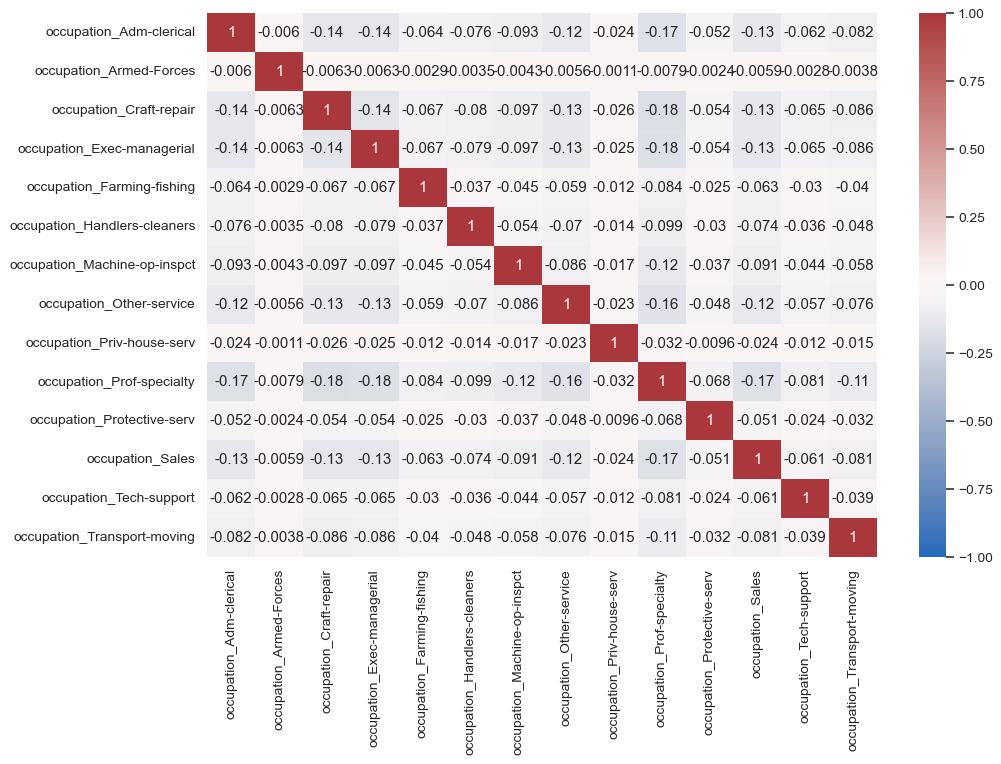

In [35]:
# one benefit of separating dummy features into columns is to decrease correlation between features
plt.figure(figsize=(12,8))
filter_col = [col for col in data if col.startswith('occupation')]
sns.heatmap(data[filter_col].corr(), annot=True, cmap='vlag',vmin=-1, vmax=1)

# Data Normalization

In [36]:
numeric_data = data.select_dtypes(include=['number']).columns
numeric_data
for col in numeric_data:
    max_col = data[col].max()
    min_col = data[col].min()
    new_max = 1
    new_min = 0
    data[col]=((data[col] - min_col)/(max_col - min_col))*(new_max-new_min) + new_min
data[numeric_data].head()

,sex,income,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,"Age Groups_(16.927, 27.429]","Age Groups_(27.429, 37.857]","Age Groups_(37.857, 48.286]","Age Groups_(48.286, 58.714]","Age Groups_(58.714, 69.143]","Age Groups_(69.143, 79.571]","Age Groups_(79.571, 90.0]"
0,0.0,0.0,0.043987,0.0,1.000000,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.081896,0.0,1.000000,0.173469,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.118021,0.0,1.000000,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.086982,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.171404,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
data.head()

,sex,income,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,"Age Groups_(16.927, 27.429]","Age Groups_(27.429, 37.857]","Age Groups_(37.857, 48.286]","Age Groups_(48.286, 58.714]","Age Groups_(58.714, 69.143]","Age Groups_(69.143, 79.571]","Age Groups_(79.571, 90.0]"
0,0.0,0.0,0.043987,0.0,1.000000,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.081896,0.0,1.000000,0.173469,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.118021,0.0,1.000000,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.086982,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.171404,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### Visualize the effect of normalization

Text(0.5, 1.0, 'numeric data after normalization')

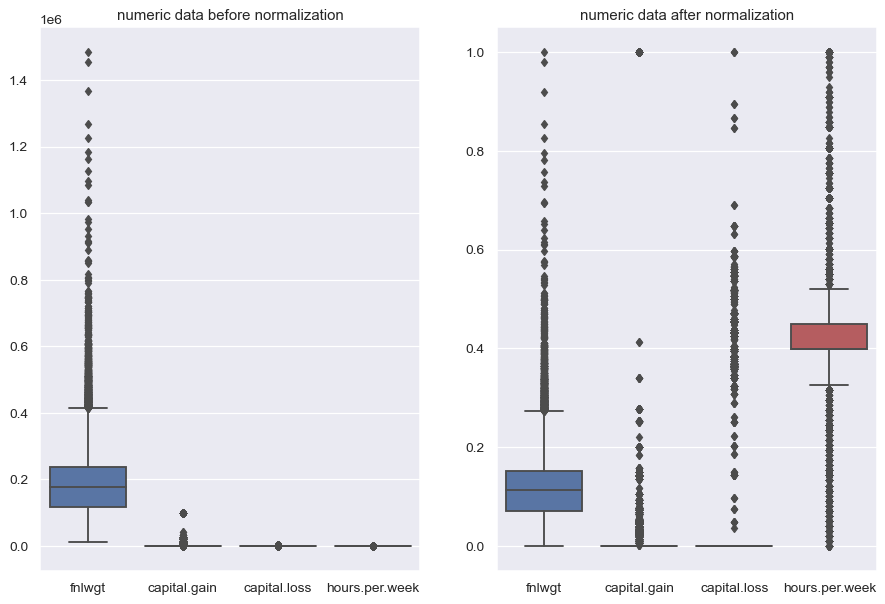

In [38]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=imported_data[['fnlwgt','capital.gain','capital.loss','hours.per.week']])
plt.title('numeric data before normalization')
plt.subplot(1,2,2)
sns.boxplot(data=data[['fnlwgt','capital.gain','capital.loss','hours.per.week']])
plt.title('numeric data after normalization')

# Feature Selection and Data Reduction

### Select KBest Method

In [39]:
from sklearn.feature_selection import SelectKBest, f_regression
# Split the data into features and target
X = data.drop('income', axis=1)
y = data['income']

# Use SelectKBest to select the top 65 features based on f_regression scores
select = SelectKBest(score_func=f_regression, k=65)
select.fit(X, y)

# Get the selected features
selected_feature = X.columns[select.get_support()]

# Print the selected features
print(selected_feature)

Index(['sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'education_Doc', 'education_Graduated',
       'education_High School', 'education_School', 'education_Undergrad',
       'marital.status_Married', 'marital.status_Not-Married',
       'marital.status_Other', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationsh

<AxesSubplot:>

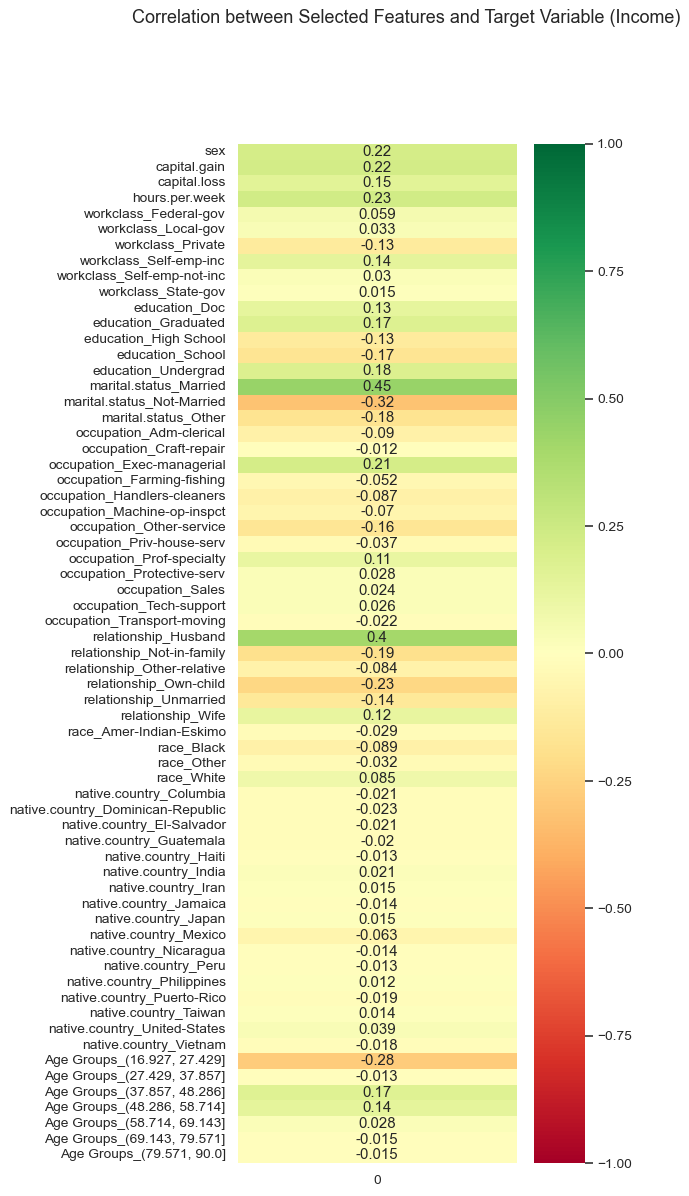

In [40]:
correl = data[selected_feature].corrwith(data["income"]).to_frame()
fig=plt.figure(figsize=(5,15))
fig.suptitle('Correlation between Selected Features and Target Variable (Income)')
sns.heatmap(correl, annot=True, cmap='RdYlGn',vmin=-1, vmax=1)

# Logistic regression

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

lr = LogisticRegression()



## training the model 


In [43]:
model = lr.fit(X_train, y_train)
print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))


Acc on training data: 0.853


## testing the model 

In [44]:
prediction = model.predict(X_test)
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on test data: 0.849


## Applying k-Fold Cross-Validation to Logistic Regression

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold

cv =RepeatedKFold(n_splits=10, n_repeats=2, random_state=0)


In [46]:
scores = cross_val_score(lr, X, 
         y, cv=cv)
print(np.mean(scores))

0.8509541521031789


## Model evaluation

In [47]:
accuracy_score(prediction, y_test.values)

0.8490063511575496

[[6853  917]
 [ 557 1435]]


Text(72.375, 0.5, 'Actual classes')

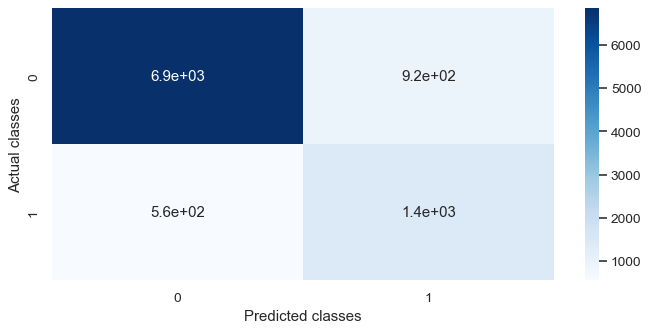

In [48]:
sns.set(rc={'figure.figsize':(9,4)})
cfm = confusion_matrix(prediction, y_test.values)
sns.heatmap(cfm, annot=True,cmap="Blues")
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      7410
         1.0       0.72      0.61      0.66      2352

    accuracy                           0.85      9762
   macro avg       0.80      0.77      0.78      9762
weighted avg       0.84      0.85      0.84      9762



## ROC curve

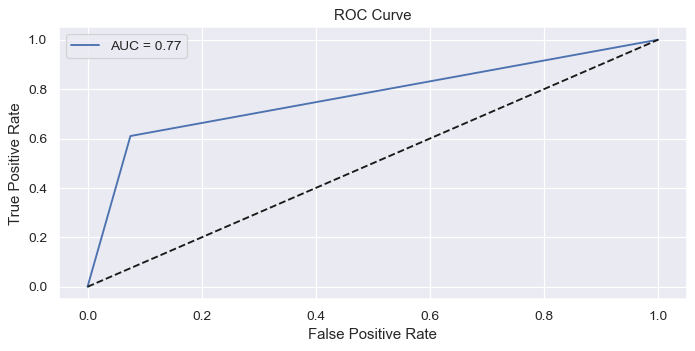

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, prediction)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, prediction)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Logistic Regression From Scratch

In [51]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression23():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression23(lr=0.09)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

0.8301577545584922


# Random Forest

In [53]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [54]:
x = data.drop('income', axis=1)
y = data['income']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x[selected_feature], y, test_size=0.3, random_state=1) # 70% training and 30% test


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred)


0.8450112681827494

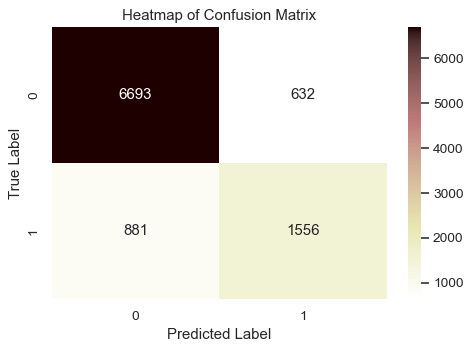

In [57]:
cm=confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink_r")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

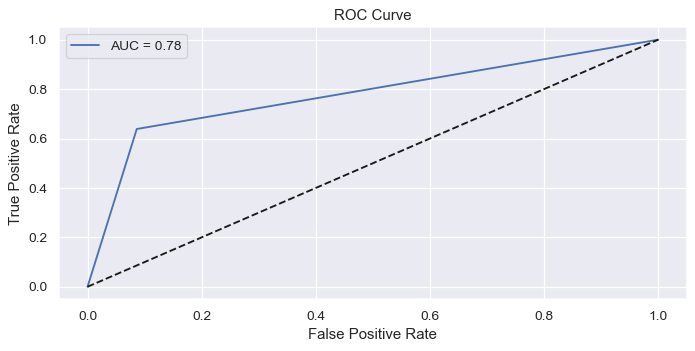

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      7325
         1.0       0.71      0.64      0.67      2437

    accuracy                           0.85      9762
   macro avg       0.80      0.78      0.79      9762
weighted avg       0.84      0.85      0.84      9762



In [60]:
param_grid = {
    'n_estimators': [10, 20, 60],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}


# Perform grid search
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print best hyperparameters and corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 60}
Best accuracy score: 0.861470911086718


# Neural Network

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf

In [62]:
tf.random.set_seed(20) 
np.random.seed(20)
inputs = tf.keras.Input(shape=(65,))
x = tf.keras.layers.Dense(30, activation='relu')(inputs)
x = tf.keras.layers.Dense(10, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit model
history = model.fit(x_train, y_train, epochs=30)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/30
712/712 [==============================] - 1s 933us/step - loss: 0.3844 - accuracy: 0.8186
Epoch 2/30
712/712 [==============================] - 1s 882us/step - loss: 0.3359 - accuracy: 0.8425
Epoch 3/30
712/712 [==============================] - 1s 887us/step - loss: 0.3266 - accuracy: 0.8461
Epoch 4/30
712/712 [==============================] - 1s 898us/step - loss: 0.3205 - accuracy: 0.8489
Epoch 5/30
712/712 [==============================] - 1s 876us/step - loss: 0.3161 - accuracy: 0.8509
Epoch 6/30
712/712 [==============================] - 1s 860us/step - loss: 0.3132 - accuracy: 0.8545
Epoch 7/30
712/712 [==============================] - 1s 863us/step - loss: 0.3107 - accuracy: 0.8538
Epoch 8/30
712/712 [==============================] - 1s 874us/step - loss: 0.3091 - accuracy: 0.8555
Epoch 9/30
712/712 [==============================] - 1s 897us/step - loss: 0.3067 - accuracy: 0.8568
Epoch 10/30
712/712 [==============================] - 1s 883us/step - loss: 0.306

306/306 [==============================] - 0s 663us/step


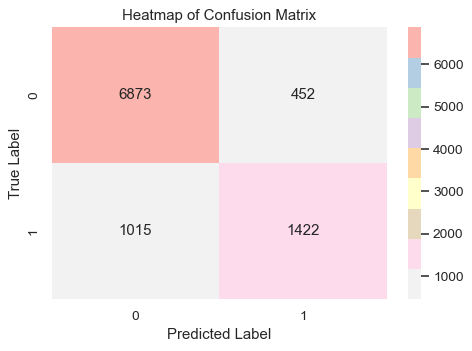

In [63]:
y_predN = np.round(model.predict(x_test))
cm_N=confusion_matrix(y_test, y_predN )
fig = plt.figure(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm_N, annot=True, fmt="d", cmap="Pastel1_r")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

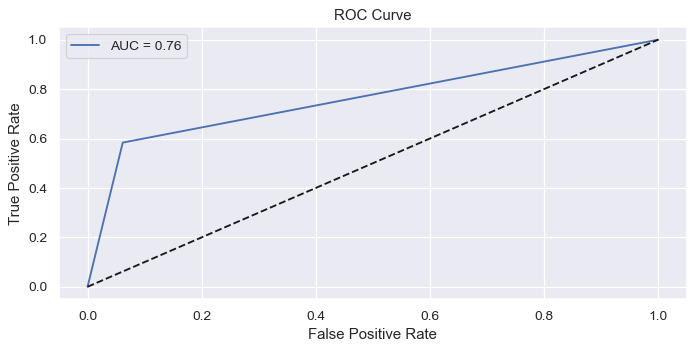

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_predN)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_predN)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [65]:
print(classification_report(y_test, y_predN))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      7325
         1.0       0.76      0.58      0.66      2437

    accuracy                           0.85      9762
   macro avg       0.82      0.76      0.78      9762
weighted avg       0.84      0.85      0.84      9762

